Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


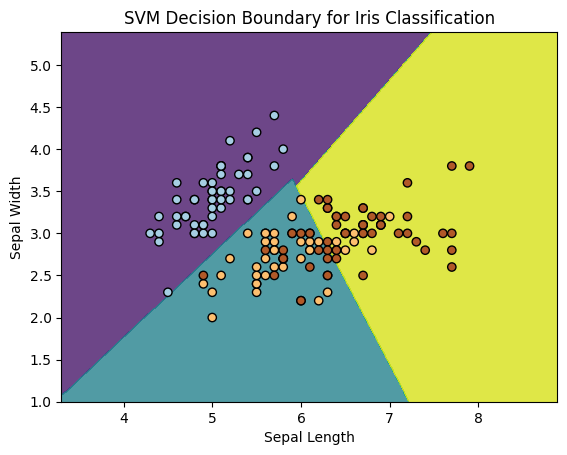

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Plot the decision boundary (for simplicity, only using the first two features)
X_2d = X[:, :2]
clf.fit(X_2d, y)

# Create a mesh to plot the decision boundary
xx, yy = np.meshgrid(np.arange(X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1, 0.01),
                     np.arange(X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary for Iris Classification')
plt.show()


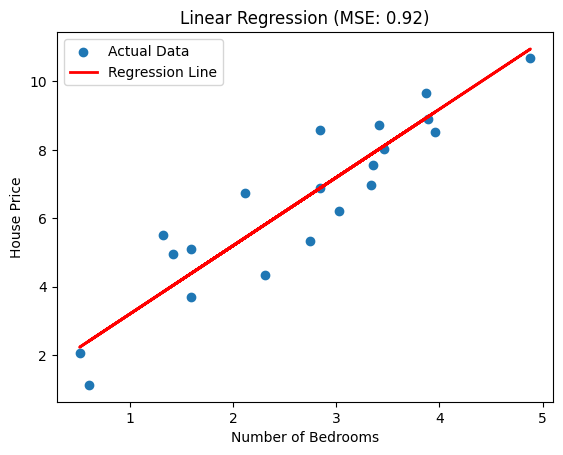

Predicted price for a 3-bedroom house: $7.19


In [4]:
# Import necessary libraries
# pip install scikit-learn matplotlib
# create a basic linear regression model to predict house prices based on the number of bedrooms.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 5  # Number of bedrooms
y = 2 * X + 1 + np.random.randn(100, 1)  # House prices with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Plot the data and the regression line
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title(f'Linear Regression (MSE: {mse:.2f})')
plt.legend()
plt.show()

# Predict the price of a house with 3 bedrooms
bedrooms = np.array([[3.0]])
predicted_price = model.predict(bedrooms)
print(f'Predicted price for a 3-bedroom house: ${predicted_price[0][0]:.2f}')